 # Wine Classification

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


 ## Load dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = (
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
    )
dataset = pd.read_csv(url, names=names, delimiter=',')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

 ## Split feature and target

In [3]:
x = dataset.drop(["Class"], axis=1) # axis=1 berarti kolom, axis-0 berarti row
y = dataset["Class"]

print(dataset.shape)
print(x.shape)
print(y.shape)


(178, 14)
(178, 13)
(178,)


 ## One-hot-encode on target

In [4]:
y = pd.get_dummies(y)
print(y.sample(10))
print(y.shape)


1  2  3
98   0  1  0
19   1  0  0
55   1  0  0
85   0  1  0
79   0  1  0
29   1  0  0
138  0  0  1
163  0  0  1
31   1  0  0
77   0  1  0
(178, 3)


 ## Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
print(x)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


 ## Split train and test

In [6]:
from sklearn.model_selection import train_test_split

y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x_train : (124, 13)
x_test : (54, 13)
y_train : (124, 3)
y_test : (54, 3)


 ## See correlation of each feature

In [7]:
corr = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis=1, sort=False)
corr.corr(method='pearson')


,0,1,2,3,4,5,6,7,8,9,10,11,12,0,1,2
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.647232,-0.726383,0.114941
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.205847,-0.295175,0.544042
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.229268,-0.362457,0.156738
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.519646,0.181764,0.350650
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.326171,-0.296972,-0.018306
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.614960,-0.047301,-0.600119
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.673770,0.042179,-0.761232
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.407680,0.011868,0.419347
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.380500,0.056208,-0.465629
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.143221,-0.694679,0.614582


 ## Train

In [8]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(int(13**2+13), int((13**2+13)/2)),
                      activation="relu", max_iter=5000, alpha=0.01, verbose=True, solver="sgd")
h = model.fit(x_train, y_train)


, loss = 0.22454478
Iteration 1253, loss = 0.22430787
Iteration 1254, loss = 0.22407142
Iteration 1255, loss = 0.22383546
Iteration 1256, loss = 0.22359991
Iteration 1257, loss = 0.22336485
Iteration 1258, loss = 0.22313021
Iteration 1259, loss = 0.22289605
Iteration 1260, loss = 0.22266233
Iteration 1261, loss = 0.22242907
Iteration 1262, loss = 0.22219627
Iteration 1263, loss = 0.22196388
Iteration 1264, loss = 0.22173199
Iteration 1265, loss = 0.22150049
Iteration 1266, loss = 0.22126943
Iteration 1267, loss = 0.22103885
Iteration 1268, loss = 0.22080866
Iteration 1269, loss = 0.22057892
Iteration 1270, loss = 0.22034962
Iteration 1271, loss = 0.22012077
Iteration 1272, loss = 0.21989234
Iteration 1273, loss = 0.21966437
Iteration 1274, loss = 0.21943681
Iteration 1275, loss = 0.21920965
Iteration 1276, loss = 0.21898294
Iteration 1277, loss = 0.21875663
Iteration 1278, loss = 0.21853079
Iteration 1279, loss = 0.21830534
Iteration 1280, loss = 0.21808031
Iteration 1281, loss = 0.217

 ## Test

In [9]:
y_pred = model.predict(x_test)


precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

   micro avg       1.00      0.98      0.99        54
   macro avg       1.00      0.98      0.99        54
weighted avg       1.00      0.98      0.99        54
 samples avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 1 20  0]
 [ 0  0 14]]
Accuracy is : 0.9814814814814815


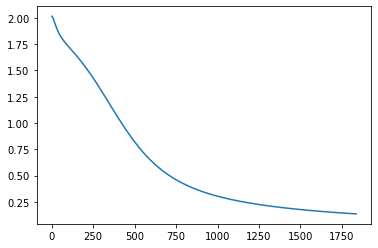

In [10]:
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(f"Accuracy is : {accuracy_score(y_pred,y_test)}")
plt.plot(h.loss_curve_)
